In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [14]:
import pandas as pd
# directory = '/kaggle/input/novel-corona-virus-2019-dataset/'
directory = ''
data_311 = '03-11-2020.csv'
data_kag = 'covid_19_data.csv'
main_set = pd.read_csv(directory + data_311)
main_set.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-11T10:53:02,67773,3046,49134,30.9756,112.2707
1,NaN,Italy,2020-03-11T21:33:02,12462,827,1045,43.0000,12.0000
2,NaN,Iran,2020-03-11T18:52:03,9000,354,2959,32.0000,53.0000
3,NaN,"Korea, South",2020-03-11T21:13:18,7755,60,288,36.0000,128.0000
4,France,France,2020-03-11T22:53:03,2281,48,12,46.2276,2.2137


In [16]:
US = main_set[main_set['Country/Region'] == 'US']
US.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
27,Washington,US,2020-03-11T22:33:03,366,29,1,47.4009,-121.4905
36,New York,US,2020-03-11T22:53:03,220,0,0,42.1657,-74.9481
39,California,US,2020-03-11T23:53:03,177,3,2,36.1162,-119.6816
51,Massachusetts,US,2020-03-11T22:53:03,95,0,1,42.2302,-71.5301
72,Diamond Princess,US,2020-03-10T02:33:04,46,0,0,35.4437,139.6380


compare the outbreak trend in different countries

China vs. Korea

In [30]:
import matplotlib.pyplot as plt

In [66]:
def clean_time_data(data):
    data = data.drop('Lat', axis=1).drop("Long", axis=1)
    data = data.dropna(axis=1)
    data = data.groupby('Country/Region').sum()
    return data

In [67]:
data = pd.read_csv(directory + 'time_series_covid_19_confirmed.csv')
data = clean_time_data(data)
data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,4,4
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Algeria,0,0,0,0,0,0,0,0,0,0,...,1,1,3,5,12,12,17,17,19,20
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,2,8,12,12


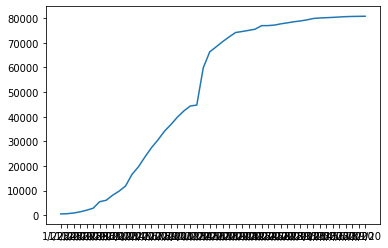

In [61]:
china = data.loc['Mainland China']
plt.plot(china)

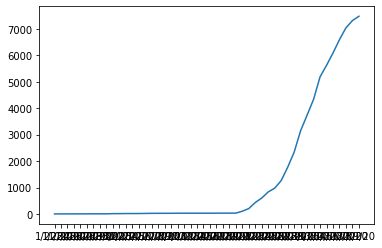

In [62]:
korea = data.loc['South Korea']
plt.plot(korea)

In [77]:
data_death = pd.read_csv(directory + 'time_series_covid_19_deaths.csv')
data_recovered = pd.read_csv(directory + 'time_series_covid_19_recovered.csv')

In [78]:
data_death = clean_time_data(data_death)
data_recovered = clean_time_data(data_recovered)
data_recovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


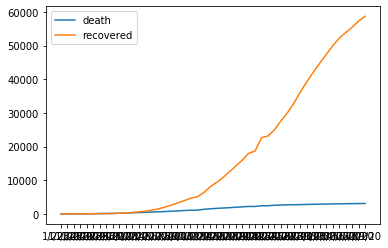

In [83]:
china_death = data_death.loc['Mainland China']
china_recovered = data_recovered.loc['Mainland China']
plt.plot(china_death, label='death')
plt.plot(china_recovered, label='recovered')
plt.legend()

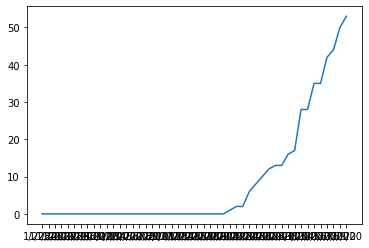

In [74]:
korea_death = data_death.loc['South Korea']
plt.plot(korea_death)